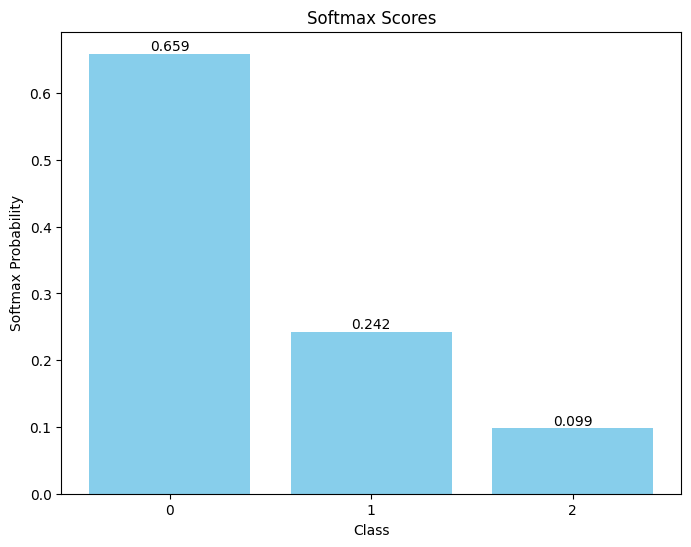

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

# Example usage:
scores = np.array([2.0, 1.0, 0.1])
softmax_scores = softmax(scores)

# Plot the softmax scores
plt.figure(figsize=(8, 6))

# Bar chart
plt.bar(range(len(softmax_scores)), softmax_scores, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Softmax Probability')
plt.title('Softmax Scores')
plt.xticks(range(len(softmax_scores)))

# Display the actual softmax scores on top of the bars
for i, score in enumerate(softmax_scores):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

plt.show()


#### Generate random scores for different classes

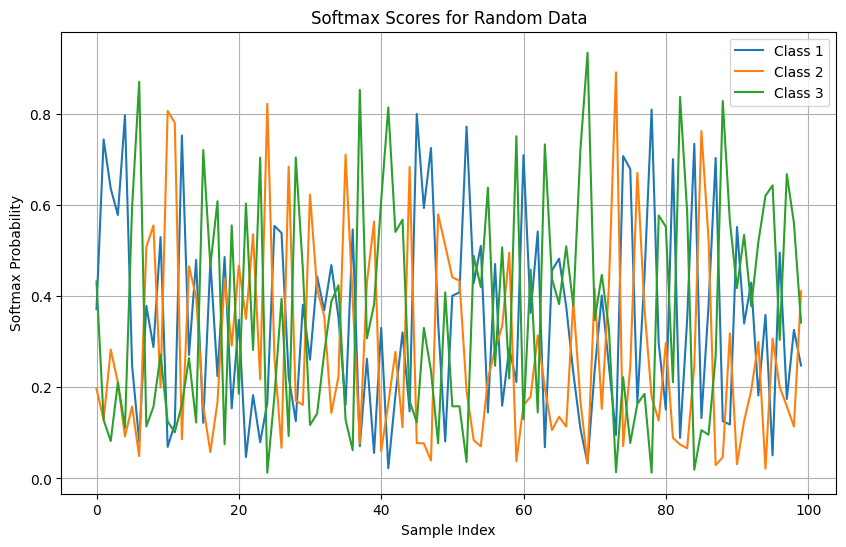

In [ ]:
  import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

# Generate random scores for different classes
np.random.seed(42)  # For reproducibility
num_classes = 3
num_samples = 100
random_scores = np.random.randn(num_samples, num_classes)

# Apply softmax to the random scores
softmax_scores = softmax(random_scores)

# Plot the softmax scores using a line graph
plt.figure(figsize=(10, 6))

for i in range(num_classes):
    plt.plot(softmax_scores[:, i], label=f'Class {i + 1}')

plt.xlabel('Sample Index')
plt.ylabel('Softmax Probability')
plt.title('Softmax Scores for Random Data')
plt.legend()
plt.grid(True)
plt.show()


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 65s 68ms/step - loss: 0.3873 - accuracy: 0.8638 - val_loss: 0.3180 - val_accuracy: 0.8851
Epoch 2/10
938/938 [==============================] - 67s 71ms/step - loss: 0.2551 - accuracy: 0.9075 - val_loss: 0.2802 - val_accuracy: 0.8977
Epoch 3/10
938/938 [==============================] - 55s 58ms/step - loss: 0.2053 - accuracy: 0.9235 - val_loss: 0.3013 - val_accuracy: 0.8923
Epoch 4/10
938/938 [==============================] - 55s 59ms/step - loss: 0.1669 - accuracy: 0.9385 - val_loss: 0.2684 - val_accuracy: 0.9077
Epoch 5/10
938/938 [==============================] - 56s 59ms/step - loss: 0.1359 - accuracy: 0.9505 - val_loss: 0.2788 - val_accuracy: 0.9055
Epoch 6/10
938/938 [==============================] - 56s 60ms/step - loss: 0.1098 - accuracy: 0.9592 - val_loss: 0.3041 - val_accuracy: 0.9035
Epoch 7/10
938/938 [==============================] - 56s 59ms/step - los

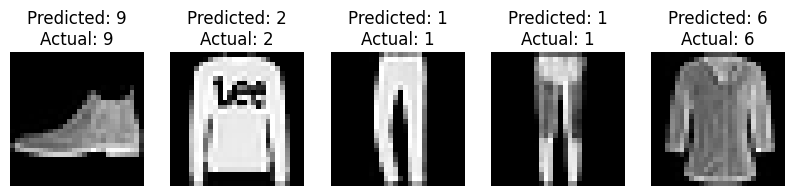

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images to add a channel dimension (required for Conv2D layer)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Number of categories (clothing types)
num_categories = 10

# Define the CNN model
model = Sequential()

# Convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

# Fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation for classification
model.add(Dense(num_categories, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

# Make predictions on a few test samples
predictions = model.predict(test_images[:5])

# Display the original images and model predictions
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}\nActual: {test_labels[i]}')
    plt.axis('off')
plt.show()


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 flatten_2 (Flatten)         (None, 1577088)           0         
                                                                 
 dense_4 (Dense)             (None, 128)               201867392 
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 201869578 (770.07 MB)
Trainable params: 201869578 (770.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
